<font size="6">**Introduzione a Google Colab**</font><br>

> (c) 2025 Antonio Piemontese


---
<p style="color:red; font-size:18px; font-weight:bold;">
🚨 Il presente notebook funziona in Google Colab.<br>
- Le celle codice specifiche di Google Colab sono sotto 'if'<br>
- Al fondo del notebook c'è un capitolo sulla compatibilità con Jupyter Notebook. 🚨
</p>

---

In [32]:
# per garantire il funzionamento delle celle specifiche di Google Colab
IN_COLAB = True

# Panoramica
*Colab* sta per *colaboratory* perché il notebook è condivisibile (con chi ha un account Google), a differenza di jupyter notebook.<br>
Per aziende o istituzioni, l'accesso a Google colab PUO' dover essere **autorizzato dall'amministratore**.<br>
**Requisito**: Google Colab richiede **un account Google**.<br>
Funziona con Python, R e Julia.

> Google Colab permette di **lavorare con i notebook**, come anche Jupyter Notebook, al quale è molto simile.

# Punti di forza

* gira sul cloud, creando una macchina virtuale (anche con potenti GPU/TPU)
* non richiede installazioni (al contrario di Anaconda); occorre caricare i notebook, i file dati, le immagini ed i file PDF nel [Google drive](https://drive.google.com/drive/home) --> cartella "Colab Notebooks" presente automaticamente (non è da creare)
* i principali package Python sono già installati (come anche in Anaconda/Jupyter)
* i notebook sono **condivisibili** (con chi ha un account Google)
* alcune feature avanzate di Jupyter - la lista delle variabili (con `%whos`), i tempi di esecuzione, ecc - sono fornite in modo nativo

# I package per visualizzare immagini e PDF
Il modulo `IPython.display` è la <u>cassetta degli attrezzi</u> di Jupyter/Colab per mostrare **contenuti ricchi** (immagini, HTML, iframe, audio, video, ecc.) direttamente nell’output della cella.<br>
Per le nsotre esigenze abbiamo prima importato i tre seguenti package:

```python
from IPython.display import Image, display,IFrame   
```
Vediamo i tre package **uno per uno**:

---

`display(...)`
- **cos’è**: la funzione “universale” che dice al notebook di **renderizzare** un oggetto (se sa come visualizzarlo).
- **come funziona**: molti oggetti hanno una rappresentazione “ricca” (HTML, PNG, SVG, JSON…). `display()` invia al front-end il cosiddetto *MIME bundle* (il “pacchetto di rappresentazioni” che Jupyter invia al frontend per mostrare un oggetto: può contenere HTML, testo, PNG, SVG, JSON… e il frontend sceglie cosa rendere.)
- **perché serve**: se l’oggetto **non è l’ultima espressione della cella**, non viene mostrato automaticamente; con `display(...)` lo forzi a comparire.

- **esempi**:
```python
from IPython.display import HTML, display
display(HTML("<b>Hello</b>"))

from IPython.display import Image, display
img = Image("plot.png")
display(img)
```

---

`Image(...)`
- **cos’è**: una utility class per **mostrare immagini** (PNG/JPEG/GIF) da **file locale, URL o bytes**.
- **parametri utili**:
    - `filename=...` oppure `url=...` oppure `data=...`
    - `width=...`, `height=...`, `format="png"`, `embed=True`
- **quando usarlo**: quando vuoi visualizzare velocemente un’immagine senza passare da matplotlib/PIL.
- **esempi**:

```python
from IPython.display import Image, display

# Da file locale
display(Image(filename="immagine.jpg", width=600))

# Da URL
display(Image(url="https://example.com/logo.png"))

# Da bytes (se l’hai già in memoria)
display(Image(data=img_bytes, format="png"))
```

**Nota**: `IPython.display.Image` non è `PIL.Image`. Se si devono manipolare i pixel, è meglio usare `PIL/NumPy`; se si deve solo mostrare, questo è più rapido.

---

`IFrame(src, width, height)`
- **cos’è**: un wrapper per incorporare contenuti via `<iframe>` (pagine web, viewer PDF del browser, app locali servite su una porta, ecc.).
- **quando usarlo**: per **PDF** e **pagine web** incorporate nel notebook.
- **parametri**: `src` (URL o percorso a un file), `width`, `height`.
- **esempi**:
```python
from IPython.display import IFrame, display

# PDF locale (in Colab spesso è /content/...)
display(IFrame("/content/file.pdf", width=1000, height=600))

# URL (se il sito permette l’embedding)
display(IFrame("https://example.com", width=1000, height=600))
```

> Suggerimenti per PDF:
> - Molti browser sanno renderizzare i PDF dentro l’iframe; se non si vede, provare un percorso assoluto (`/content/...` in Colab) o l’alternativa con `HTML(<object ...>)`.
> - Alcuni siti vietano l’embedding (header `X-Frame-Options`): in quel caso l’`IFrame` mostrerà un errore (non dipende da Jupyter).


In [33]:
from IPython.display import Image, display,IFrame   

import os            # necessario a Google Colab per vedere da una cella codice
                     # i contenuti del 'content'

if IN_COLAB:
    import google.colab  # Imports the Google Colab module, which provides Colab-specific functionality for the notebook environment.

ModuleNotFoundError: No module named 'google.colab'

# Il caricamento di immagini in Google Colab
Molti notebook devono incorporare **alcune immagini *png***.<br>
> L'operazione di incorporamento/visualizzazione dell'immagine in una cella codice (o markdown) è **DIFFERENTE** a seconda che la **notebook interface** sia ***Jupyter Notebook oppure Google Colab***.<br>

Occorre dunque preliminarmente - **GIA' FATTO PRIMA**:
- impostare un **toggle binario 0/1** (`IN_COLAB`), a seconda della notebook interface: 0 se Jupyter Notebook, 1 se Google Colab; tale toggle sarà **testato** da tutte le celle del notebook che devono incorporare immagini da visualizzare, che così potranno usare codice differente a seconda della notebook interface
- importare *una tantum* i package `Image` e `display`, necessari in Jupyter Notebook e Google Colab per l'incorporamento delle immagini.

> In questo modo, **la visualizzazione delle immagini del notebook sarà indipendente dalla notebook interface**.


**DOVE devono TROVARSI le immagini**? (per essere visualizzate dalle varie celle)

Con ***Jupyter Notebook*** devono trovarsi nella **stessa cartella del notebook** (il path è infatti relativo).<br>
Con ***Google Colab*** devono essere **caricate nella directory *content* dello storage volatile della sessione**, in questo modo:
- fare click sull'icona *Files* al fondo del menù laterale di sinistra (di Google Colab); per default, è mostrata la directory *content* della *session storage*, che è costituita da una serie di cartella (non solo *content*)
- fare click sull'icona *Upload to session storage* (non confondere con il bottone di *Upload* di Gemini) e quindi caricare l'immagine
- possono occorrere alcuni secondi prima che l'immagine risulti elencata (vedi la rotella di avanzamento caricamento a fondo finestra)
- verificare l'effettiva disponibilità dell'immagine nella *session storage* (in Google Colab) nel seguente modo:

In [23]:
# comando solo per Google Colab
if IN_COLAB:
    print(os.listdir('/content'))      # la print è necessaria, altrimenti NON visualizza nulla.
                                       # la funzione 'os.listdir()' infatti restituisce una lista, che poi occorre
                                       # assegnare ad una variabile o passare ad una funzione!

**Attenzione**: il caricamento in Google Colab va fatto ad OGNI nuova sessione per TUTTE le immagini necessarie in quello SPECIFICO notebook.

**Come trovare le immagini nel notebook?** - *il MASTER di questa cella è nel nb A. Introduzione*<br>
- `ctrl+F` in **Google Colab** funziona bene e trova tutte le occorrenze '.png'
- `ctrl+F` funziona nel **browser** (e quindi anche in **Jupyter Notebook**), e consente di cercare anche nelle celle markdown, ma solo nella versione renderizzata (cioè dopo aver eseguito la cella). Se una cella è compressa o in modalità modifica, può non essere inclusa nei risultati.
- in Jupyter Notebook si può usare il menù: *Edit --> Find and Replace* e poi vedere i risultati facendo click sulla barra verticale
- in Jupyter Lab c’è una funzione integrata chiamata "Trova nel notebook" che cerca in tutte le celle, incluse quelle Markdown
- un'ultima soluzione è un editor di testo/codice come VSCode

# La visualizzazione di PDF in Google Colab
Occorre il package `files`:
- il modulo `files` della libreria `google.colab` contiene l’insieme di funzioni che Google mette a disposizione in Colab per **gestire file tra il computer locale e l’ambiente virtuale del notebook**. E cioè una specie di “ponte” tra il PC e Colab.
- le funzioni principali sono `upload`, `download` e `view`

In [29]:
if IN_COLAB:
    from google.colab import files

Primo modo (sola visualizzazione - precaricamento manuale):

In [ ]:
display(IFrame("/content/file.pdf", width=1000, height=600))

Secondo modo (caricamento e visualizzazione) - non funziona!

In [30]:
# 1️⃣ Carica il file dal computer locale
uploaded = files.upload()

# 2️⃣ Prende il nome del primo file caricato
pdf_name = next(iter(uploaded))   # es. 'documento.pdf'

# 3️⃣ Lo mostra dentro un IFrame
display(IFrame(pdf_name, width=1000, height=600))


NameError: name 'files' is not defined

# Compatibilità

# Immagini da caricare nella *session storage* per questo notebook
- `google_colab`
- `google_colab_runtimes`
- `runtime_vs_session_google_colab`
- `session_storage_filesystem`

# *run-time* vs *sessione*

Un interessante comando, disponibile dal menù `Runtime`, è `Disconnect and delete runtime`. **E' un reset totale**. Succede quanto segue:

🔌 1. Disconnette la sessione corrente
- Termina la connessione tra il tuo browser e la macchina virtuale (VM) che stava eseguendo il codice.
- Qualsiasi codice in esecuzione viene interrotto immediatamente.

💾 2. Elimina l’ambiente temporaneo
-La macchina virtuale (con la sua RAM, i file temporanei, i pacchetti installati, i file caricati, ecc.) viene spenta e completamente cancellata.
- Qualsiasi file creato o caricato durante la sessione (ad esempio nella cartella /content) viene perso, a meno che tu non l’abbia salvato su Google Drive o scaricato sul tuo computer.

🔁 3. Reimposta l’ambiente
- Se ti ricolleghi successivamente, otterrai una nuova macchina virtuale con le impostazioni di default, senza traccia della sessione precedente (ambiente pulito da zero).

**Quando usarlo?**<br>
Può essere utile quando:
- Vuoi liberare risorse (se non stai più usando la sessione).
- **Vuoi risolvere eventuali problemi ripartendo da zero.**
- Stai passando da una sessione o da un notebook all’altro e ti serve un ambiente pulito.



# La *session storage*

In Google Colab, il *session storage* ha una **struttura gerarchica** simile a quella di <u>un normale filesystem Linux</u>, eccola: <br>

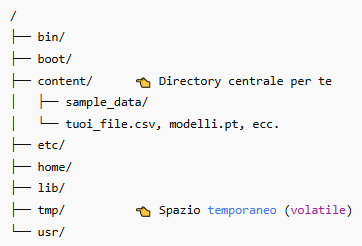

In [ ]:
# if one-liner, cioè la normale IF che richiede diverse righe è qui compattata in una riga sola.
# il codice associato al ramo if vero è riportato ad inizio riga (un aspetto particolare che può confondere)
Image('/content/session_storage_filesystem.png') if IN_COLAB else display(Image(filename='session_storage_filesystem.png'))

📁 Cos’è la cartella `/content/`?<br>
`/content/` è **la directory di lavoro predefinita** in Google Colab. È:<br>

- Dove ti trovi quando esegui codice (`%pwd → /content`)

- Dove vengono salvati i tuoi file se non specifichi un altro percorso (ad es. `df.to_csv("filename.csv")`)

- Il punto in cui vengono montati i file di Google Drive se usi `drive.mount()`

In [ ]:
%pwd   # print working directory (la directory corrente)

'/content'

# I runtime type

Vedi anche [questa ottima guida](https://drlee.io/choosing-the-right-colab-runtime-a-guide-for-data-scientists-and-analysts-57ee7b7c9638).

Per i **limiti di utilizzo dei runtime** (a seconda del tipo di account Google) vedi [questa chat](https://chatgpt.com/share/6863aeff-4e48-8012-95cb-3e4ad39f3701).

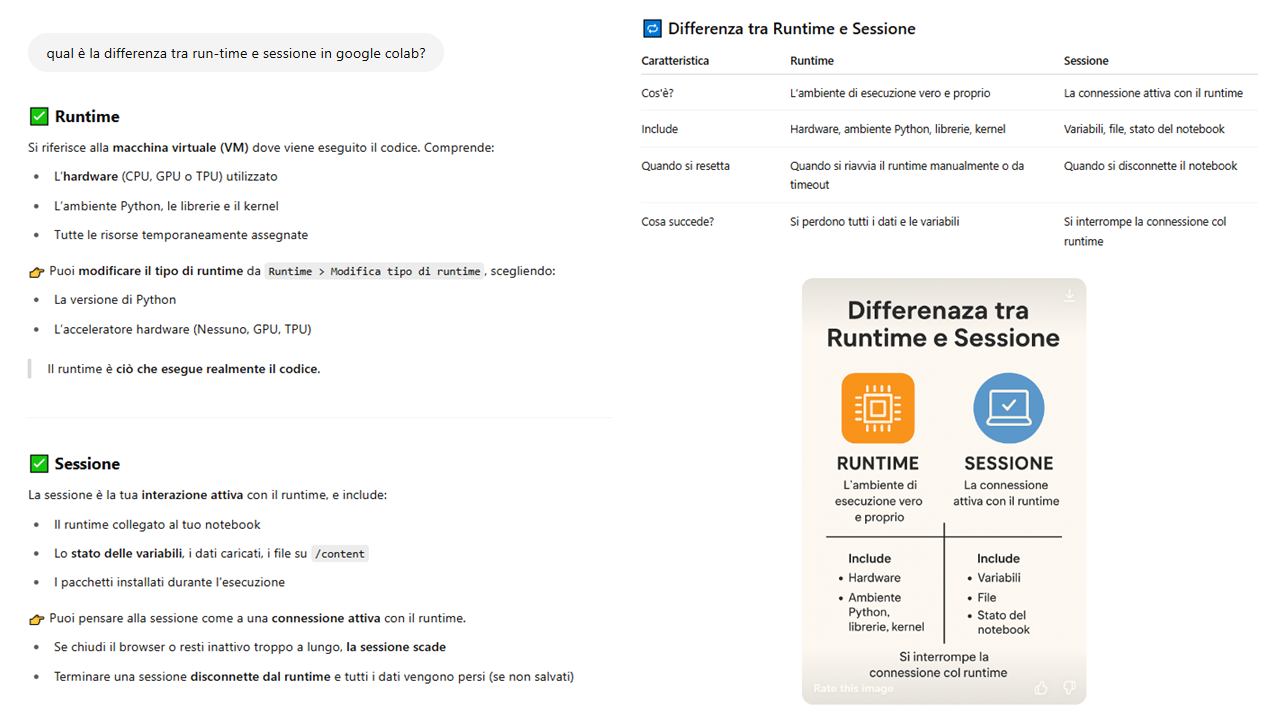

In [ ]:
Image('/content/runtime_vs_session_google_colab.png') if IN_COLAB else display(Image(filename='runtime_vs_session_google_colab.png'))

Cioè, in altri termini, la chiusura della sessione implica la disconnessione con il run-time.

![](google_colab_pro.png)

# Il funzionamento di Google Colab

* Spunta verde in alto a destra quando stabilisce la connessione con il run-time (ci vuole qualche secondo, altrimenti allocati all'esecuzione della prima cella di codice)
* Salvataggio automatico su mydrive, cartella *colab notebooks*, presente di default.
* Avanzamento celle: shift+invio oppure ctrl+invio (come in jupyter).
* Il notebook è esportabile in un file .py con il solo codice (menù File --> Export (al fondo). In lettura o lettura e scrittura. In realtà genera un file testo con tutto destro, vedi [questa chat](https://chatgpt.com/share/6863b79d-65a8-8012-9a5c-1946826ef16b) per un codice di filtro delle celle markdown.
* Link, click, apre notebook, File --> Salva copia su drive.
* Output celle di codice eliminabili!
* Condivisione nb con "condividi" (con altri account Google).
* per vedere la lista degli argomenti di una funzione/metodo - dopo aver posizionato il cursore in mezzo alle () - premere la combinazione di tasti `ctrl` + `maiusc` + `space bar` (è una funzionalità simile a `maiusc` + `tab` di Jupyter Notebook) - vedi in merito [questo post](https://stackoverflow.com/questions/49042988/quick-docstrings-in-colaboratory).


# I limiti di Google Colab

I limiti rispetto a Jupyter Notebook:
* *Limited Session Lifetime*: le sessioni Colab hanno **un limite temporale**, che può interrompere i processi lunghi
* *Dependency Installation*: l'installazione di dipendenze esterne (package Python!) può richiedere tempo e deve essere ripetuta **ad ogni sessione**
* la memoria di sessione (*session storage*) è persa in caso di restart del kernel: occorre ricaricare csv, png e pdf.
* **non ha gli ambienti virtuali, o meglio ne ha uno solo**
* **non ha la auto-completion**
* i notebook devono essere modificati (rispetto alla versione del notebook per Jupyter Notebook) per quanto riguarda il caricamento delle immagini e dei PDF
* l'attivazione dei link esterni (alle URL di Internet) deve essere autorizzata esplicitamente
* il rendering degli output a volte è macchinoso e differente da Jupytyer Notebook

# How to Show Image from Folder in Google Colab

Da [qui](https://saturncloud.io/blog/how-to-show-image-from-folder-in-google-colab/).

As a software engineer you may often need to work with **image data** in your projects. One common task is to **display images stored in a folder within a Google Colab notebook**. In this blog post we will walk you through **the steps** to show an image from a folder in Google Colab.

## Step 1: Import Required Libraries
Before we begin, we need to import the required libraries. In this case, we will use the `os` and `matplotlib.pyplot` libraries. The `os` library will help us **navigate the file system**, while `matplotlib.pyplot` will allow us to **display the image**.

In [ ]:
import os
import matplotlib.pyplot as plt

## Step 2: Mount Google Drive
Next, we need to **mount our Google Drive** to access the image files. To mount your Google Drive, run the following code:

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

ModuleNotFoundError: No module named 'google.colab'

This will prompt you to authenticate with your Google account and generate an access token to access your Google Drive.

## Step 3: Navigate to the Image Folder
Once you have mounted your Google Drive, you can navigate to the folder where your images are stored. We can use the `os` library to change the current working directory to the image folder.

In [1]:
os.chdir('/content/drive/My Drive/Colab Notebooks')

NameError: name 'os' is not defined

Replace the above path with the **actual path** to your image folder.

## Step 4: Load and Display the Image
Now that we are in the correct folder, we can **load the image** using the `matplotlib.pyplot` library.

In [ ]:
img = plt.imread('google_colab.png')

Replace `google_colab.png` with the actual name of your image file.

Finally, we can display the image using the `imshow()` function.

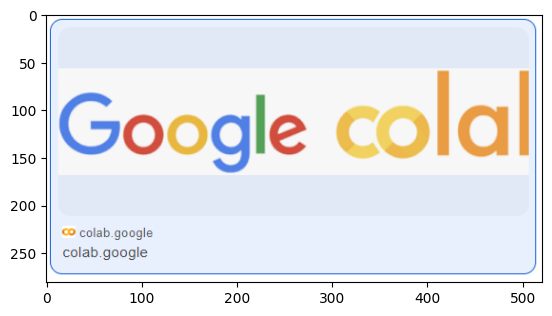

In [ ]:
plt.imshow(img)

And that’s it! You should now see the image displayed in your Google Colab notebook.

# Conclusion
In this blog post, we have shown you how to display an image from a folder in Google Colab. By following the steps outlined above, you can easily load and display images in your Colab notebooks. This can be useful for a variety of tasks, such as image classification, object detection, and more.

Remember to import the required libraries, mount your Google Drive, navigate to the image folder, and load and display the image using the `matplotlib.pyplot` library. With these steps, you’ll be able to display images in your Google Colab notebook in no time!

# La compatibilità con Jupyter Notebook

Il funzionamento dei notebook in Google Colab e Jupyter Notebook <u>differisce per pochi aspetti</u>. Questa sezione fornisce alcune linee guida su come **scrivere celle che possono funzionare ugualmente in entrambe le IDE**. 

In [20]:
# impostazione del TOGGLE BINARIO:
try:
    import google.colab                      # package disponibile SOLO in Google Colab
    IN_COLAB = True
except ImportError:
    IN_COLAB = False

print("Siamo in Colab:", IN_COLAB)

Siamo in Colab: False


## Lettura immagini

Per garantire che i vari notebook funzionino correttamente sia in Colab che JN, **le celle di visualizzazione delle immagini** useranno un codice *one-liner* di questo tipo (*fonte: chatGPT*):<br>
```python
Image('/content/image_name.png') if IN_COLAB else display(Image(filename='image_name.png'))
```

> Con ***Jupyter Notebook*** le immagini devono trovarsi nella **stessa cartella del notebook** (il path è infatti relativo).<br>
> Con ***Google Colab*** devono essere **caricate nella directory *content* dello storage volatile della sessione**.

## Lettura file PDF

In [37]:
if IN_COLAB:
    display(IFrame("/content/file.pdf", width=1000, height=600))
else:
    display(IFrame("file.pdf", width=1000, height=600))